In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [4]:
df = datasets.load_iris()

In [51]:
df.data #independent variables
#df.target #dependent variale
#df.feature #column headers
#print(df.DESCR) #dataset description

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
X=df.data
Y=df.target

In [9]:
X.shape

(150, 4)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [12]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [16]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None) #to view the entire eigen vector, no subsetting
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.73357923 0.22153097 0.03974125 0.00514855]


In [17]:
0.73357923 + 0.22153097 + 0.03974125 + 0.00514855

1.0

In [41]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) #to view the entire eigen vector, no subsetting
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.73357923 0.22153097]


In [42]:
0.73357923 + 0.22153097

0.9551102

In [21]:
pca.n_components_

2

In [34]:
#Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train_new, Y_train)
#Predicting the test set results
Y_pred = classifier.predict(X_test_new)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion matrix:")
print(cfm)
class_r=classification_report(Y_test,Y_pred)
print("Classfication report:")
print(class_r)
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy score:",acc)

Confusion matrix:
[[10  0  0]
 [ 0 10  3]
 [ 0  0  7]]
Classfication report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.77      0.87        13
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Accuracy score: 0.9


In [44]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3) #to view the entire eigen vector, no subsetting
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.73357923 0.22153097 0.03974125]


In [45]:
#Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train_new, Y_train)
#Predicting the test set results
Y_pred = classifier.predict(X_test_new)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion matrix:")
print(cfm)
class_r=classification_report(Y_test,Y_pred)
print("Classfication report:")
print(class_r)
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy score:",acc)

Confusion matrix:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Classfication report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy score: 1.0


In [47]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #to view the entire eigen vector, no subsetting
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.73357923 0.22153097]


In [48]:
#Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train_new, Y_train)
#Predicting the test set results
Y_pred = classifier.predict(X_test_new)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion matrix:")
print(cfm)
class_r=classification_report(Y_test,Y_pred)
print("Classfication report:")
print(class_r)
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy score:",acc)

Confusion matrix:
[[10  0  0]
 [ 0 10  3]
 [ 0  0  7]]
Classfication report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.77      0.87        13
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Accuracy score: 0.9


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


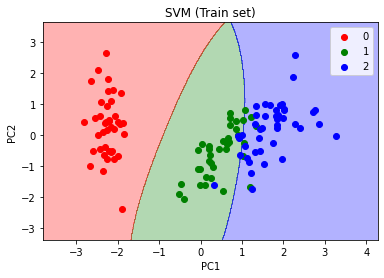

In [52]:
# Visualising the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_new, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1 ],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVM (Train set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


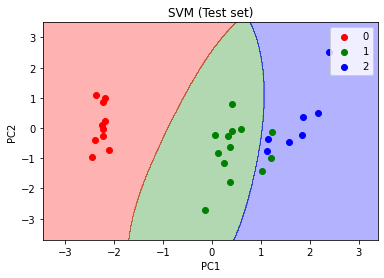

In [55]:
# Visualising the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1 ],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [58]:
X=df.data
Y=df.target

In [59]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [60]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [61]:
# Applying PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components =2)
#n_components cannot be larger than min(n_features, n_classes - 1).
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_
print(explained_variance)

[0.99190792 0.00809208]


In [62]:
#Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train, Y_train)
#Predicting the test set results
Y_pred = classifier.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion matrix:")
print(cfm)
class_r=classification_report(Y_test,Y_pred)
print("Classfication report:")
print(class_r)
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy score:",acc)

Confusion matrix:
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Classfication report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy score: 0.9666666666666667


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


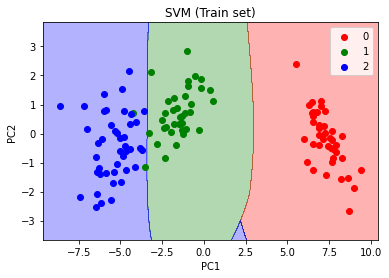

In [64]:
# Visualising the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1 ],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVM (Train set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()